<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/Taxi_Tip_Prediction_using_Scikit_Learn_and_Snap_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taxi Tip Prediction using Scikit**-**Learn**

# Introduction :
The dataset used in this exercise session is publicly available here: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page (all rights reserved by Taxi & Limousine Commission(TLC), City of New York). The TLC Yellow Taxi Trip Records of June, 2019 are used in this notebook. The prediction of the tip amount can be modeled as a regression problem. To train the model you can use part of the input dataset and the remaining data can be used to assess the quality of the trained model. First, let's download the dataset.


In [ ]:
# download June 2020 TLC Yellow Taxi Trip records
!wget -nc https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv

File ‘yellow_tripdata_2019-06.csv’ already there; not retrieving.



In [ ]:
# download June 2020 TLC Yellow Taxi Trip records

!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
import time
import warnings
import gc, sys
warnings.filterwarnings('ignore')

# DATA SET ANALYSISA

In [ ]:
df =pd.read_csv('yellow_tripdata_2019-06.csv')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


the data seems more ambigous than normal.we need understand the each and every coloum of the data first.
VendorID represented by number but some of the vendorIDs are same for different rows so it more like representation of group. so it is a categorical data.
VendorID-->categorical data

RatecodeID is also seems like a representaion that belongs to some category. SO,
RatecodeID-->categorical data

PULocationID & DOLocationID are pickup and drop location ids. we gonna drop the because we have trip distance we dont need these coloums.

payment type is also represented in numbers but they are categorical type
payment_type--->categorical data

remaing all the data seems like float and they are in fair type.


<h1>Lets clean Data First<h1>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936004 entries, 0 to 3936003
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), int64(1), object(3)
memory usage: 540.5+ MB


In [ ]:
df2=df.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936003 entries, 0 to 3936002
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), int64(1), object(3)
memory usage: 570.6+ MB


In [ ]:
df3=df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','PULocationID'],axis='columns')
df3.head()

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,1.0,0.0,1.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,1.0,0.0,1.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,1.0,4.4,1.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,0.0,0.8,1.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,1.0,1.7,1.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936004 entries, 0 to 3936003
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   DOLocationID           float64
 5   payment_type           float64
 6   fare_amount            float64
 7   extra                  float64
 8   mta_tax                float64
 9   tip_amount             float64
 10  tolls_amount           float64
 11  improvement_surcharge  float64
 12  total_amount           float64
 13  congestion_surcharge   float64
dtypes: float64(13), int64(1)
memory usage: 420.4 MB


In passenger count it there some value with 0.0. that means no passenger has travelled. no passenger means no tip. we need to remove them.

In [ ]:
df4 = df3[df3['passenger_count'] != 0.0]

In [ ]:
df4.head()

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,1.0,0.0,1.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,1.0,0.0,1.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,1.0,4.4,1.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
4,1,1.0,1.7,1.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2.0,1.6,1.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5


we also need remove the 0.0 valued rows from trip_distance.
0.0 distance no travelling

In [ ]:
df5 = df4[df4['trip_distance'] != 0.0]

In [ ]:
df5.head()

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2,1,1.0,4.4,1.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
4,1,1.0,1.7,1.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2.0,1.6,1.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
6,1,4.0,0.6,1.0,148.0,2.0,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
7,1,2.0,1.2,1.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832071 entries, 2 to 3936003
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   DOLocationID           float64
 5   payment_type           float64
 6   fare_amount            float64
 7   extra                  float64
 8   mta_tax                float64
 9   tip_amount             float64
 10  tolls_amount           float64
 11  improvement_surcharge  float64
 12  total_amount           float64
 13  congestion_surcharge   float64
dtypes: float64(13), int64(1)
memory usage: 438.5 MB


lets visulize the each column


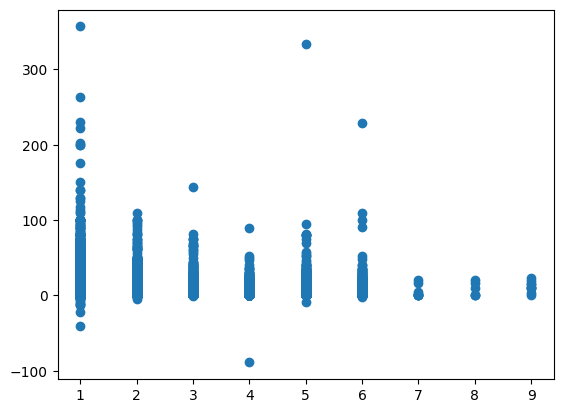

In [ ]:
plt.scatter(df5['passenger_count'],df5['tip_amount'])
plt.show()

It seems like there are some tip values are negative and some values are outlied. if the no of the these outliers is small then we can remove them

In [ ]:
df5[(df5['tip_amount']<0.0) | (df5['tip_amount']>250.0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 52348 to 3934680
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               52 non-null     int64  
 1   passenger_count        52 non-null     float64
 2   trip_distance          52 non-null     float64
 3   RatecodeID             52 non-null     float64
 4   DOLocationID           52 non-null     float64
 5   payment_type           52 non-null     float64
 6   fare_amount            52 non-null     float64
 7   extra                  52 non-null     float64
 8   mta_tax                52 non-null     float64
 9   tip_amount             52 non-null     float64
 10  tolls_amount           52 non-null     float64
 11  improvement_surcharge  52 non-null     float64
 12  total_amount           52 non-null     float64
 13  congestion_surcharge   52 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 6.1 KB


There are only 52 rows that are outlied. 52 is very small compared to the total data rows

In [ ]:
df6 = df5[(df5['tip_amount'] >= 0.0) & (df5['tip_amount']<250.0)]
df6.head()

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2,1,1.0,4.4,1.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
4,1,1.0,1.7,1.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2.0,1.6,1.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
6,1,4.0,0.6,1.0,148.0,2.0,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
7,1,2.0,1.2,1.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5


In [ ]:
df6.shape[0]

3832018

Now it looks good all the values of tip are  above 0.0 and 250.0

---



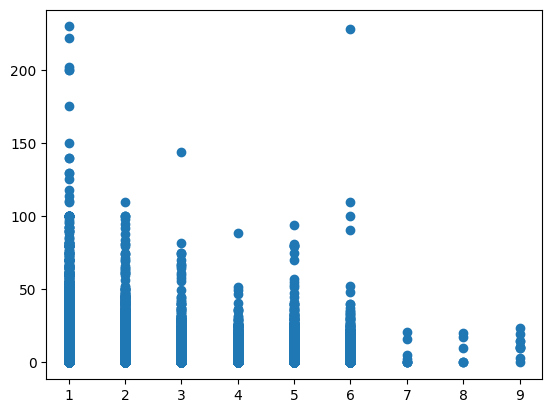

In [ ]:
plt.scatter(df6['passenger_count'],df6['tip_amount'])
plt.show()

lets visulize the trip distance w r t tip amount

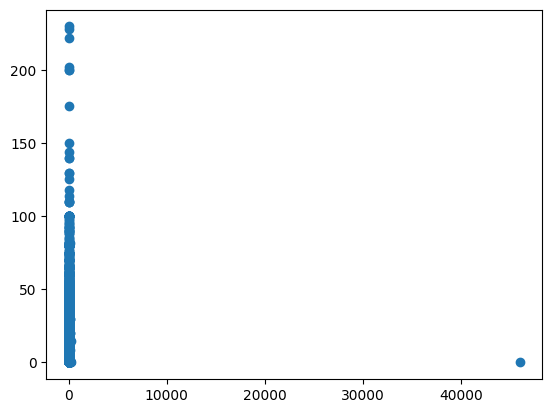

In [ ]:
plt.scatter(df6['trip_distance'],df6['tip_amount'])
plt.show()

there is one out lier which 40000 distance. all the values will be negligible w r t 40000 so we need to remove this outlier

In [ ]:
df7 = df6[(df6['trip_distance'] < 40000.0) ]
df7.shape[0]

3832017

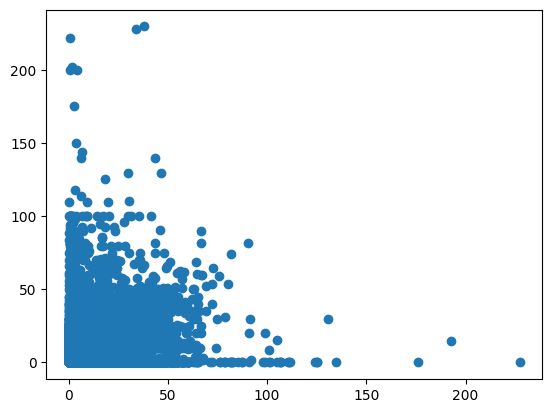

In [ ]:
plt.scatter(df7['trip_distance'],df7['tip_amount'])
plt.show()

lets visulize fair amount

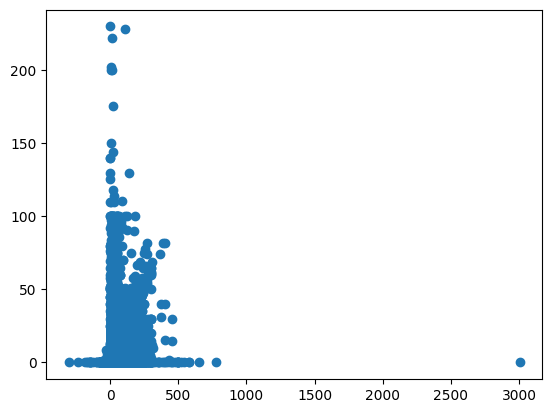

In [ ]:
plt.scatter(df7['fare_amount'],df7['tip_amount'])
plt.show()

here also we have an outlier at 3000 which too much far from all data points

In [ ]:
df8 = df7[(df7['fare_amount'] < 1000.0) ]
df8.shape[0]

3832016

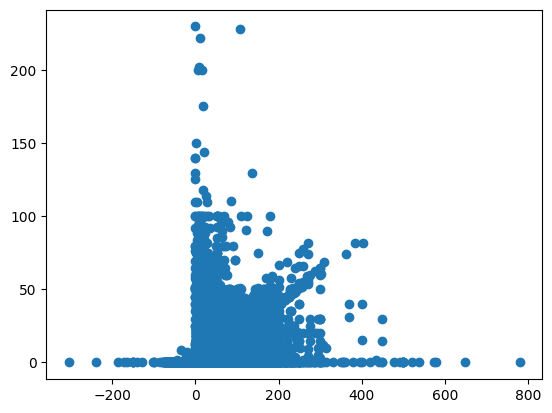

In [ ]:
plt.scatter(df8['fare_amount'],df8['tip_amount'])
plt.show()

there are some negative values in fare amount too, lets check how they look like

In [ ]:
df8[df8['fare_amount']<0.0]

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1071,2,5.0,0.87,1.0,162.0,4.0,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-8.8,-2.5
1707,2,2.0,0.77,1.0,170.0,4.0,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-8.8,-2.5
1846,2,2.0,0.01,1.0,264.0,3.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.0
3160,2,1.0,3.03,1.0,42.0,4.0,-11.5,-0.5,-0.5,0.0,0.0,-0.3,-15.3,-2.5
3728,2,1.0,0.83,1.0,234.0,4.0,-5.5,-0.5,-0.5,0.0,0.0,-0.3,-9.3,-2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933794,2,2.0,0.50,1.0,237.0,4.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5
3934500,2,1.0,0.78,1.0,237.0,4.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5
3934804,2,1.0,0.05,1.0,7.0,2.0,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,0.0
3934922,2,1.0,0.63,1.0,164.0,4.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5


6314 rowa are with negative values lets convert them into positive values.

In [ ]:
cols=['fare_amount','extra','mta_tax','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']

In [ ]:
df8[cols] = df8[cols].abs()

In [ ]:
df8[df8['fare_amount']<0.0]

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


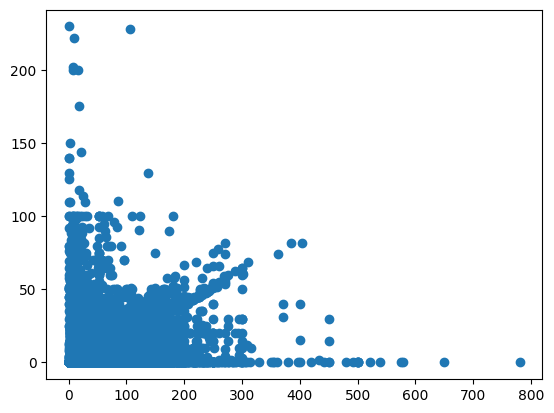

In [ ]:
plt.scatter(df8['fare_amount'],df8['tip_amount'])
plt.show()

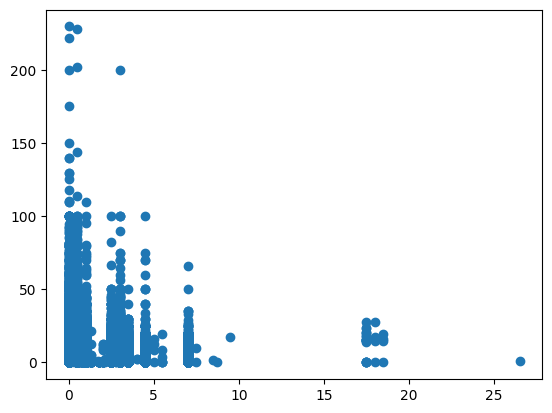

In [ ]:
plt.scatter(df8['extra'],df8['tip_amount'])
plt.show()

In [ ]:
df8[df8['extra']>15].shape[0]

30

In [ ]:
df9=df8[df8['extra']<15]
df9.shape[0]

3831986

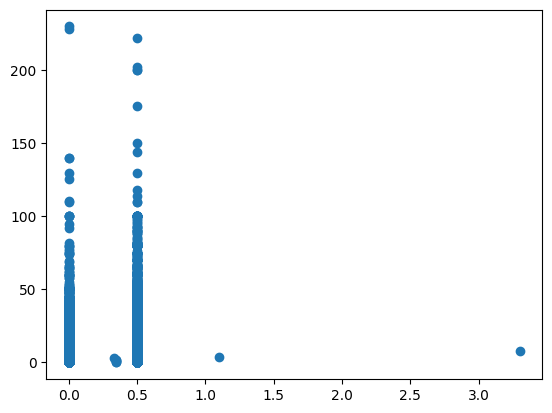

In [ ]:
plt.scatter(df9['mta_tax'],df9['tip_amount'])
plt.show()

In [ ]:
df10=df9[df9['mta_tax']<1.0]
df10.head()

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2,1,1.0,4.4,1.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
4,1,1.0,1.7,1.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2.0,1.6,1.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
6,1,4.0,0.6,1.0,148.0,2.0,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
7,1,2.0,1.2,1.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5


In [ ]:
df10.shape

(3831984, 14)

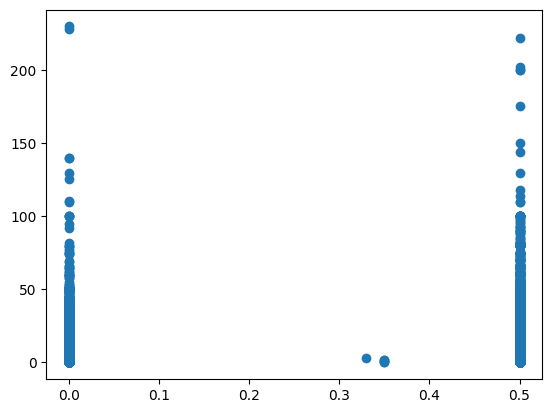

In [ ]:
plt.scatter(df10['mta_tax'],df10['tip_amount'])
plt.show()

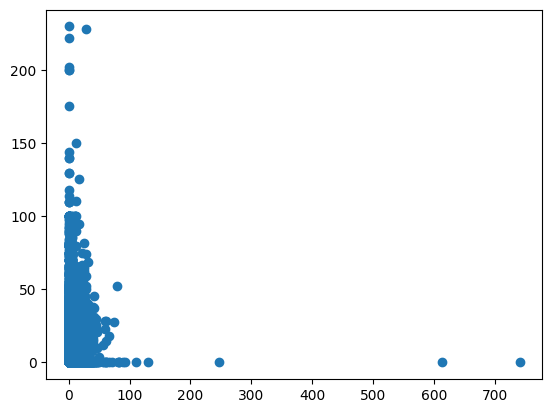

In [ ]:
plt.scatter(df10['tolls_amount'],df10['tip_amount'])
plt.show()

In [ ]:
df11=df10[df10['tolls_amount']<200]
df11.shape

(3831981, 14)

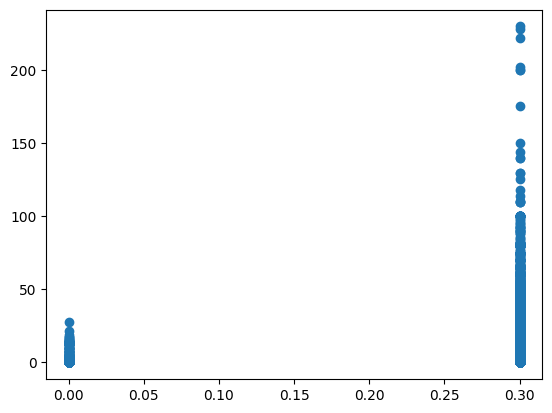

In [ ]:
plt.scatter(df11['improvement_surcharge'],df11['tip_amount'])
plt.show()

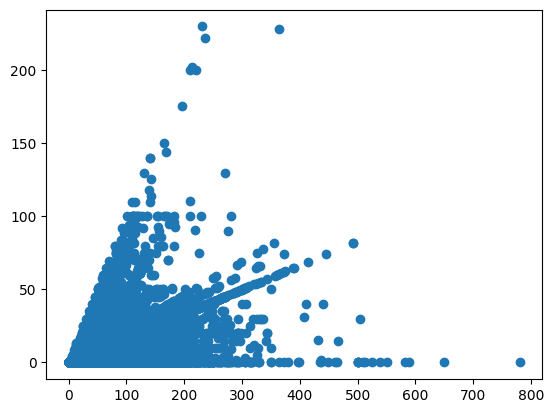

In [ ]:
plt.scatter(df11['total_amount'],df11['tip_amount'])
plt.show()

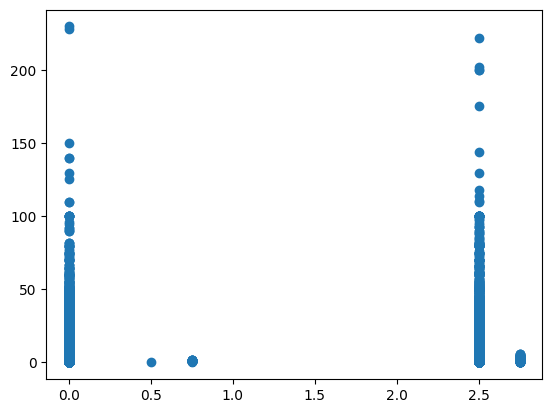

In [ ]:
plt.scatter(df11['congestion_surcharge'],df11['tip_amount'])
plt.show()

so we removed all the outliers of the now lets start one hot encoding for all the categorical data. coloums like

In [ ]:
df11.head()

,VendorID,passenger_count,trip_distance,RatecodeID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2,1,1.0,4.4,1.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
4,1,1.0,1.7,1.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2.0,1.6,1.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
6,1,4.0,0.6,1.0,148.0,2.0,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
7,1,2.0,1.2,1.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5


In [ ]:
df12=pd.get_dummies(df11, columns=['VendorID','RatecodeID','payment_type'], prefix='dmy', drop_first=True)
df12.head()

,passenger_count,trip_distance,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,dmy_4,dmy_2.0,dmy_3.0,dmy_4.0,dmy_5.0,dmy_6.0,dmy_99.0,dmy_2.0,dmy_3.0,dmy_4.0
2,1.0,4.4,7.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1.7,148.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.6,125.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,...,0,0,0,0,0,0,0,0,0,0
6,4.0,0.6,148.0,4.5,3.0,0.5,0.00,0.0,0.3,8.30,...,0,0,0,0,0,0,0,1,0,0
7,2.0,1.2,249.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.columns

Index(['passenger_count', 'trip_distance', 'DOLocationID', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'dmy_2', 'dmy_4', 'dmy_2.0', 'dmy_3.0', 'dmy_4.0', 'dmy_5.0', 'dmy_6.0',
       'dmy_99.0', 'dmy_2.0', 'dmy_3.0', 'dmy_4.0'],
      dtype='object')

In [ ]:
df12.drop(['DOLocationID'],axis=1,inplace=True)

In [ ]:
X=df12.drop(['tip_amount'], axis=1)
y=df12['tip_amount']

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train,y_train)

0.9895642429826618